***Please note that if you are viwing this notebook on github then plotly outputs will not be visible which are key elements of this analysis. Hence you may view this notebook on kaggle [here](https://www.kaggle.com/shumbho/preprocessing-and-information-extraction-naukri) 🙏***

In [1]:
# !kaggle datasets download -d promptcloud/jobs-on-naukricom
# !unzip jobs-on-naukricom.zip

### Context

This dataset was created by the in house teams at PromptCloud and DataStock. This dataset holds up to 30K unique data sample records. You can download the full dataset [here](https://app.datastock.shop/?site_name=Naukri Job Postings).

### Content

This dataset contains the following:

    Total Records Count :: 484879 

    Domain Name: naukri.com 

    Date Range : 01st Jul 2019 - 30th Aug 2019  

    File Extension: csv

    Available Fields:
    -- Uniq Id,
    -- Crawl Timestamp,
    -- Job Title,
    -- Job Salary,
    -- Job Experience Required,
    -- Key Skills,
    -- Role Category,
    -- Location,
    -- Functional Area,
    -- Industry, Role 

### Inspiration

Data is needed by everybody and reliable data can be found in very few places. We strive to provide the best in quality data to all our clients at all times. That is what keeps us going.

### Dataset Link

https://www.kaggle.com/promptcloud/jobs-on-naukricom

### Task

This task was created for the main purpose of analysis and detailed explanation of the dataset. 

<hr>

<b>First we will preprocess and clean each feature of the dataset, and then we will try to extract some information from cleaned data.</b>

Data pre-processing steps:

1. Imputate missing values in all features
2. Preprocess job title
3. Preprocess job salary
4. Preprocess job experience 
5. Preprocess key skills
6. Preprocess role caregory
7. Preprocess location
8. Preprocess functional area
9. Preprocess industry
10. Preprocess role

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# sns.set()

from wordcloud import WordCloud

In [2]:
df = pd.read_csv('data.csv')
df.shape

(30000, 11)

In [3]:
df.head(3)

Uniq Id            Crawl Timestamp  \
0  9be62c49a0b7ebe982a4af1edaa7bc5f  2019-07-05 01:46:07 +0000   
1  3c52d436e39f596b22519da2612f6a56  2019-07-06 08:04:50 +0000   
2  ffad8a2396c60be2bf6d0e2ff47c58d4  2019-08-05 15:50:44 +0000   

                                           Job Title  \
0                              Digital Media Planner   
1                           Online Bidding Executive   
2   Trainee Research/ Research Executive- Hi- Tec...   

                     Job Salary Job Experience Required  \
0   Not Disclosed by Recruiter               5 - 10 yrs   
1   Not Disclosed by Recruiter                2 - 5 yrs   
2   Not Disclosed by Recruiter                0 - 1 yrs   

                                          Key Skills Role Category   Location  \
0                      Media Planning| Digital Media   Advertising     Mumbai   
1   pre sales| closing| software knowledge| clien...  Retail Sales  Pune,Pune   
2   Computer science| Fabrication| Quality check|...           R&D    Gurgaon   

                                     Functional Area  \
0  Marketing , Advertising , MR , PR , Media Plan...   
1              Sales , Retail , Business Development   
2                           Engineering Design , R&D   

                                Industry                              Role  
0  Advertising, PR, MR, Event Management  Media Planning Executive/Manager  
1         IT-Software, Software Services           Sales Executive/Officer  
2                  Recruitment, Staffing                     R&D Executive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               29950 non-null  object
 4   Job Experience Required  29427 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


Checking for duplicates

In [5]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [Uniq Id, Crawl Timestamp, Job Title, Job Salary, Job Experience Required, Key Skills, Role Category, Location, Functional Area, Industry, Role]
Index: []

Checking for duplicate uniq ids

In [6]:
df[df.duplicated(['Uniq Id'])]

Empty DataFrame
Columns: [Uniq Id, Crawl Timestamp, Job Title, Job Salary, Job Experience Required, Key Skills, Role Category, Location, Functional Area, Industry, Role]
Index: []

In [7]:
df.drop(['Uniq Id','Crawl Timestamp'], axis=1, inplace=True)

Percentage of missing values :
Job Title                  1.916667
Job Salary                 0.166667
Job Experience Required    1.910000
Key Skills                 4.236667
Role Category              7.683333
Location                   1.923333
Functional Area            1.910000
Industry                   1.910000
Role                       3.003333
dtype: float64


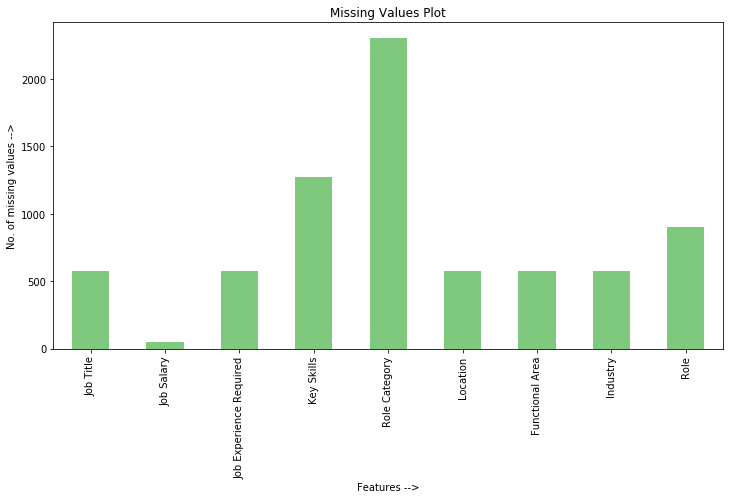

In [8]:
print('Percentage of missing values :')
print(df.isnull().sum()*100/(df.notnull().sum()+df.isnull().sum()))

plt.figure(figsize=(12,6))
df.isnull().sum().plot(kind='bar', colormap='Accent')
plt.title('Missing Values Plot')
plt.xlabel('Features -->')
plt.ylabel('No. of missing values -->')
plt.show()


Except for null rows in feature 'Role Category' dropping all other null rows 

In [9]:
df.dropna(subset=np.delete(df.columns.values, 4),inplace=True)
df.isnull().sum()*100/(df.notnull().sum()+df.isnull().sum())

Job Title                  0.000000
Job Salary                 0.000000
Job Experience Required    0.000000
Key Skills                 0.000000
Role Category              4.801354
Location                   0.000000
Functional Area            0.000000
Industry                   0.000000
Role                       0.000000
dtype: float64

Job Title                  22982
Job Salary                  1067
Job Experience Required      254
Key Skills                 26566
Role Category                204
Location                    2523
Functional Area               72
Industry                     122
Role                         644
dtype: int64


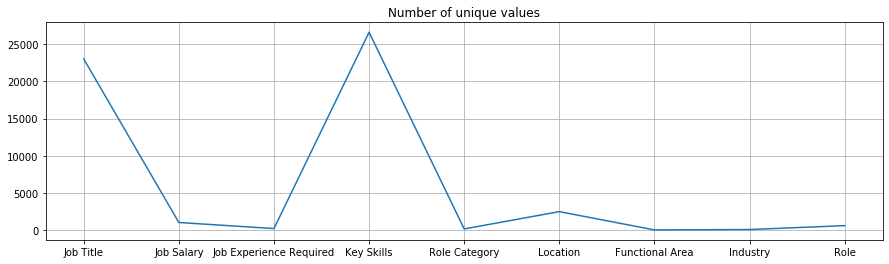

In [10]:
print(df.nunique())
plt.figure(figsize=(15,4))
plt.plot(df.nunique())
plt.grid()
plt.title('Number of unique values')
plt.show()

<hr>

### Pre-process Job Title

In [11]:
job_title = df['Job Title'].value_counts()

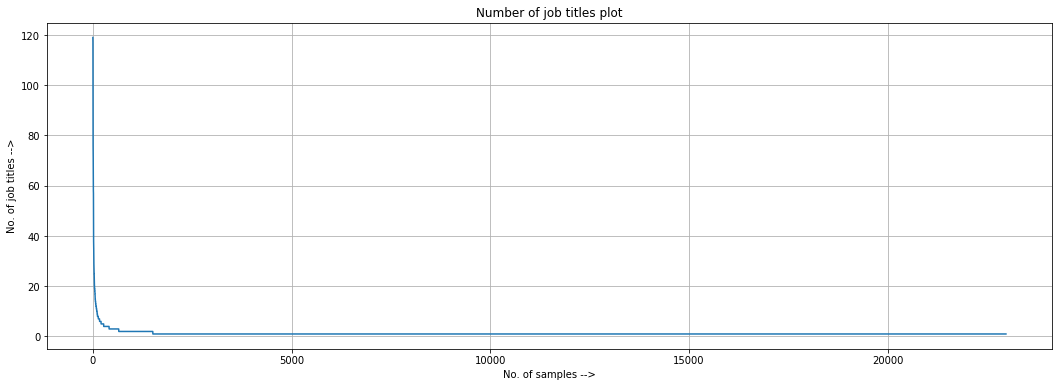

In [12]:
plt.figure(figsize=(18,6))
plt.plot(job_title.values)
plt.xlabel('No. of samples -->')
plt.ylabel('No. of job titles -->')
plt.title('Number of job titles plot')
plt.grid()
plt.show()

In [13]:
df['Job Title'] = [re.sub('[^a-zA-Z]+', ' ', i.lstrip()) for i in df['Job Title']]
df['Job Title'].value_counts().iloc[:10]

Sales Executive                   120
Business Development Executive    118
PHP Developer                     117
Business Development Manager       99
Java Developer                     82
Graphic Designer                   81
Software Engineer                  80
Android Developer                  76
Content Writer                     74
Sales Manager                      71
Name: Job Title, dtype: int64

<hr>

### Job Salary

Not Disclosed by Recruiter    20924
2,00,000-3,00,000               167
2,00,000-4,00,000               148
3,00,000-5,00,000               140
50,000-3,00,000                 129
3,00,000-8,00,000               111
2,00,000-5,00,000               107
3,00,000-6,00,000               106
1,50,000-2,50,000               100
4,00,000-9,00,000                96
Name: Job Salary, dtype: int64


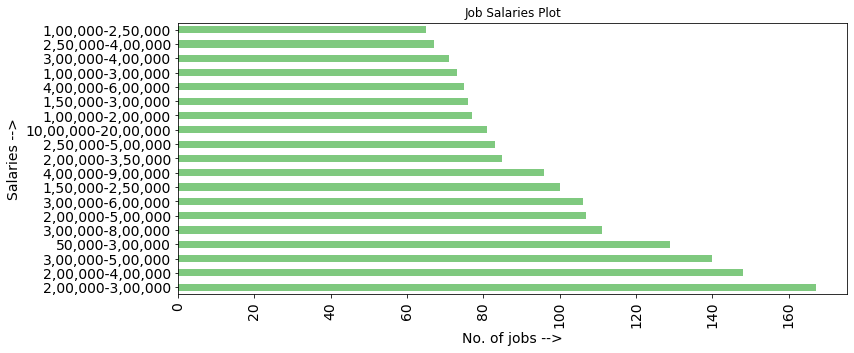

In [14]:
df['Job Salary'] = [re.sub('[^0-9,-]+', '', i) if 'PA' in i else 'Not Disclosed by Recruiter' for i in df['Job Salary']]
print(df['Job Salary'].value_counts().iloc[:10])
plt.figure(figsize=(12,5))
df['Job Salary'].value_counts().iloc[1:20].plot(kind='barh', colormap='Accent')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Salaries -->',fontsize=14)
plt.xlabel('No. of jobs -->',fontsize=14)
plt.title('Job Salaries Plot')
plt.show()

<hr>

### Job Experience Required

2-5     2021
2-7     1669
5-10    1552
3-8     1422
1-3     1200
1-6     1061
3-5     1047
1-5     1008
0-5      957
0-1      872
Name: Job Experience Required, dtype: int64


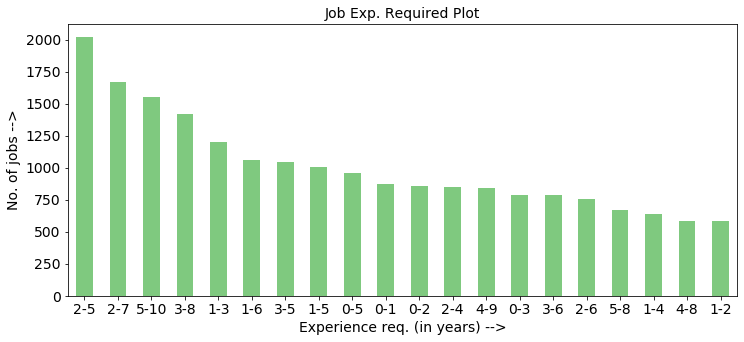

In [15]:
df['Job Experience Required'] = [re.sub('[^0-9,-]+', '', i) for i in df['Job Experience Required']]
print(df['Job Experience Required'].value_counts().iloc[:10])
plt.figure(figsize=(12,5))
df['Job Experience Required'].value_counts().iloc[:20].plot(kind='bar', colormap='Accent')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.xlabel('Experience req. (in years) -->',fontsize=14)
plt.ylabel('No. of jobs -->',fontsize=14)
plt.title('Job Exp. Required Plot',fontsize=14)
plt.show()

<hr>

### Key Skills

In [16]:
df['Key Skills'] = df['Key Skills'].map(lambda x: ' '.join(['_'.join(i.lstrip().split()) for i in x.split('|') if len(i) > 1]).lower())
df['Key Skills'].value_counts().index.ravel()

array(['counselor mentor trainer advisor teaching',
       'help_desk customer_service customer_relationship access_controls asset_management vendor_management',
       'teaching educator counselor mentor trainer advisor', ...,
       'sql_server .net c# web_services web_application software_development design_patterns unit_testing continuous_integration c#.net mongodb',
       'tele-callers',
       'maven linux coding rdbms xml analytical jsp shell_scripting http application_development'],
      dtype=object)

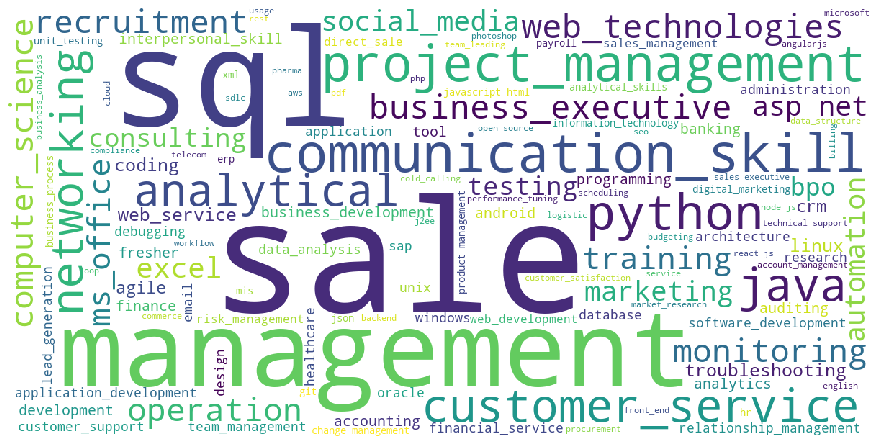

In [17]:

common_words = ' '.join(df['Key Skills'].value_counts().index.ravel())
  
wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='white',
                min_font_size = 10).generate(common_words) 


plt.figure(figsize = (16, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<hr>

### Role Category

In [18]:
print('Median length of strings:', np.median(df['Role Category'].map(lambda x: len(str(x))).tolist()))
print('Mean length of strings: %.2f' % np.array(df['Role Category'].map(lambda x: len(str(x))).tolist()).mean())
print('Std. Deviation: %.2f' % np.array(df['Role Category'].map(lambda x: len(str(x))).tolist()).std())

Median length of strings: 19.0
Mean length of strings: 21.63
Std. Deviation: 86.15


In [19]:
df['Role Category'].value_counts().iloc[:15]

Programming & Design                          8365
Voice                                         2342
Retail Sales                                  2316
HR/ Recruitment / IR                          1097
Admin/Maintenance/Security/Datawarehousing     910
Accounts                                       862
Senior Management                              856
Other                                          850
Corporate Sales                                694
Production/Manufacturing/Maintenance           569
System Design/Implementation/ERP/CRM           492
Marketing                                      467
Medical Professional                           409
Creative                                       389
Engineering Design                             355
Name: Role Category, dtype: int64

Some of the Role Category had company descriptions and other unrelated data. Here we remove that and replace some punctuation marks.

In [20]:
df['Role Category'] = df['Role Category'].map(lambda x: np.where(len(str(x)) > 80, 'N.A.', x))
df['Role Category'] = df['Role Category'].map(lambda x: re.sub('\(.*?\)', '', x))
df['Role Category'] = df['Role Category'].map(lambda x: ' '.join(['_'.join(j.lstrip().rstrip().split()) if len(j.lstrip().rstrip().split()) != 1 else j.lstrip().rstrip() for j in x.split('/')]))

Binning Values

In [21]:
df.loc[df['Role Category'].str.contains('Ford', case=False), 'Role Category'] = 'Operations'
df.loc[df['Role Category'].str.contains('Telecom', case=False), 'Role Category'] = 'Telecom'
df.loc[df['Role Category'].str.contains('HR', case=False), 'Role Category'] = 'HR Recruitment IR'
df.loc[df['Role Category'].str.contains('LOGISTICS', case=False), 'Role Category'] = 'Logistics'
df.loc[df['Role Category'].str.contains('Bank', case=False), 'Role Category'] = 'Retail Personal_Banking'
df.loc[df['Role Category'].str.contains('Sales', case=False), 'Role Category'] = 'Sales'
df.loc[df['Role Category'].str.contains('System_Design', case=False), 'Role Category'] = 'Programming_&_Design'
df.loc[df['Role Category'].str.contains('nan', case=False), 'Role Category'] = 'N.A.'


Programming_&_Design    8857
Sales                   3713
N.A.                    3521
Voice                   2342
HR Recruitment IR       1098
Accounts                 862
Senior_Management        856
Other                    850
Marketing                467
Medical_Professional     409
Name: Role Category, dtype: int64


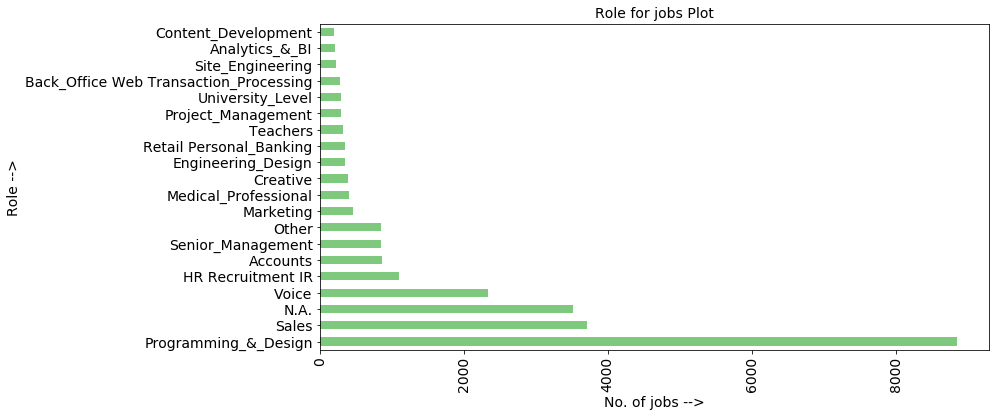

In [22]:
print(df['Role Category'].value_counts().iloc[:10])
plt.figure(figsize=(12,6))
df['Role Category'].value_counts().iloc[:20].plot(kind='barh', colormap='Accent')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Role -->',fontsize=14)
plt.xlabel('No. of jobs -->',fontsize=14)
plt.title('Role for jobs Plot',fontsize=14)
plt.show()

<hr>

### Location

In [23]:
df['Location'] = df['Location'].map(lambda x: re.sub('\(.*?\)|[^\w]|More', ' ',  x))
df['Location'] = df['Location'].map(lambda x: ' '.join(set(x.strip().split())).upper())

BENGALURU    5174
MUMBAI       3489
PUNE         2605
HYDERABAD    2319
GURGAON      1842
CHENNAI      1604
KOLKATA      1360
NOIDA        1248
AHMEDABAD    1074
DELHI        1068
Name: Location, dtype: int64


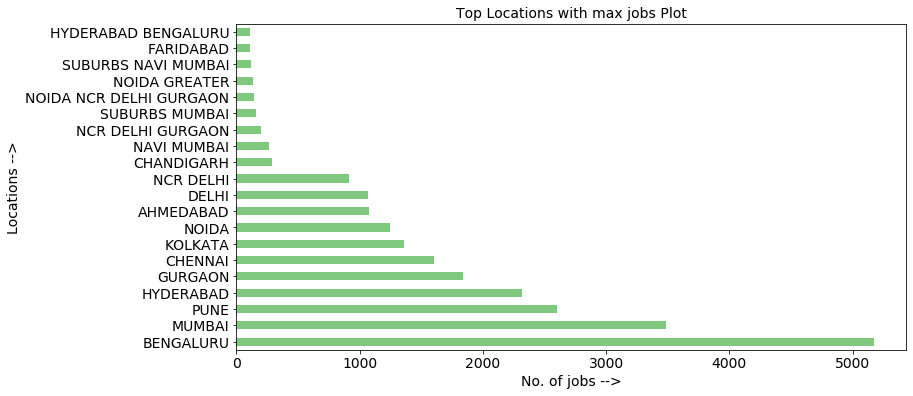

In [24]:
print(df['Location'].value_counts().iloc[:10])
plt.figure(figsize=(12,6))
df['Location'].value_counts().iloc[:20].plot(kind='barh', colormap='Accent')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Locations -->',fontsize=14)
plt.xlabel('No. of jobs -->',fontsize=14)
plt.title('Top Locations with max jobs Plot',fontsize=14)
plt.show()

<b>Since one posting can have multiple locations, we must also look at all city names seperately rather than job postings wise.<b>

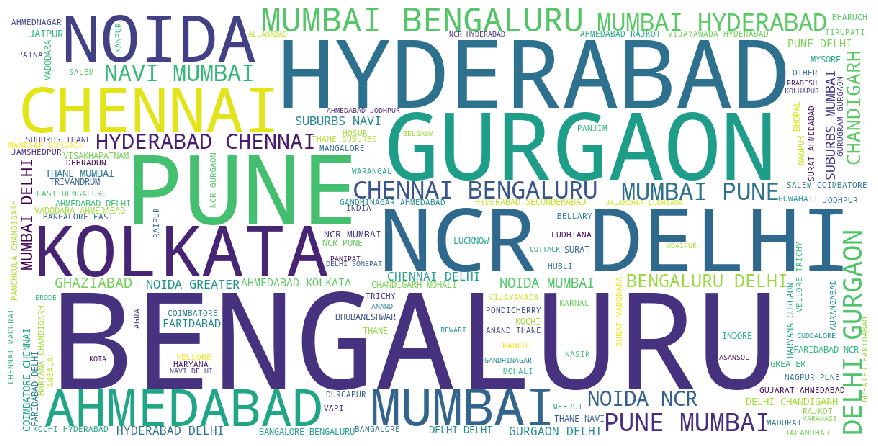

In [25]:
master = list()
for i in df.Location:
    master.extend(i.split(' '))
  
wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='white',
                min_font_size = 10).generate(' '.join(master)) 


plt.figure(figsize = (16, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<hr>

### Functional Area

In [26]:
df['Functional Area'] = df['Functional Area'].map(lambda x: np.where(len(str(x)) > 80, 'N.A.', x))
df['Functional Area'] = df['Functional Area'].map(lambda x: x.replace('/',','))
df['Functional Area'] = df['Functional Area'].map(lambda x: ' '.join(['_'.join(i.split()) if len(i.strip().split(' ')) > 1 else i.strip() for i in x.split(',')]))

In [27]:
df.loc[df['Functional Area'].str.contains('IT_Software_', case=False), 'Functional Area'] = 'IT_Software'

IT_Software                                         10530
Sales Retail Business_Development                    3985
ITES BPO KPO LPO Customer_Service Operations         3121
HR Recruitment Administration IR                     1360
Accounts Finance Tax Company_Secretary Audit         1333
Marketing Advertising MR PR Media_Planning            894
Other                                                 846
Financial_Services Banking Investments Insurance      701
Production Manufacturing Maintenance                  690
Teaching Education Training Counselling               689
Name: Functional Area, dtype: int64


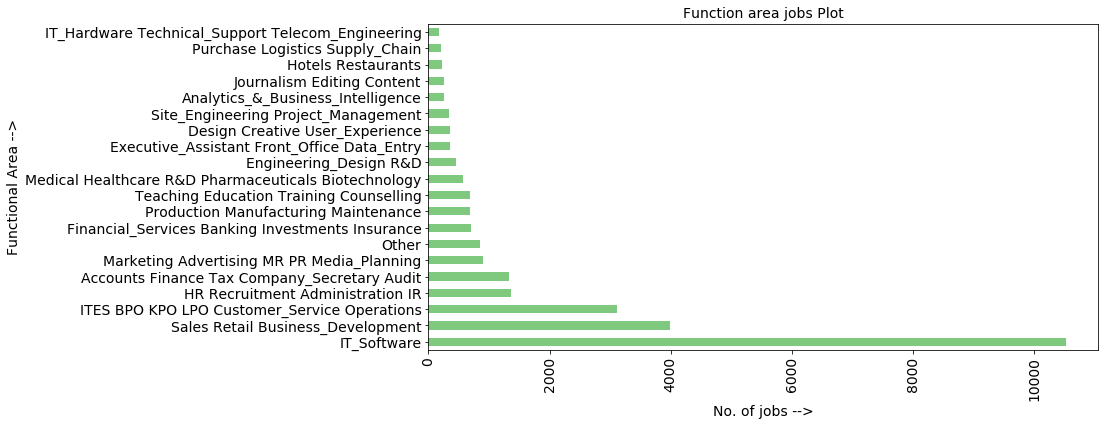

In [28]:
print(df['Functional Area'].value_counts().iloc[:10])
plt.figure(figsize=(12,6))
df['Functional Area'].value_counts().iloc[:20].plot(kind='barh', colormap='Accent')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Functional Area -->',fontsize=14)
plt.xlabel('No. of jobs -->',fontsize=14)
plt.title('Function area jobs Plot',fontsize=14)
plt.show()

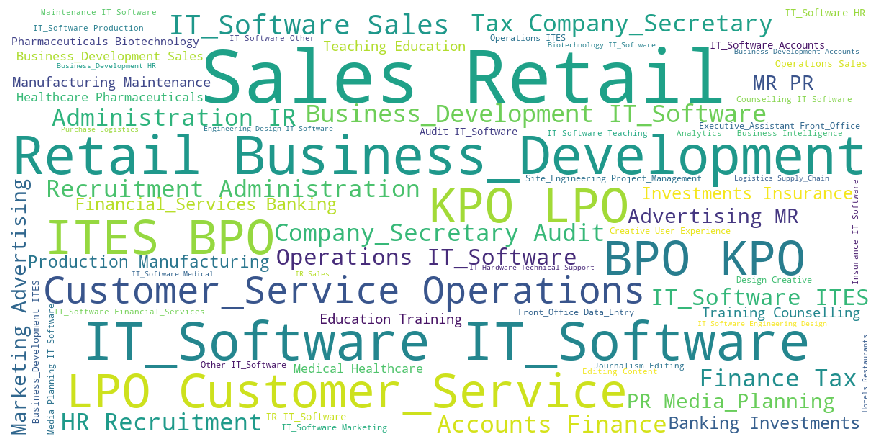

In [29]:

functional_area = ' '.join(df['Functional Area'].values.ravel())
  
wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='white',
                min_font_size = 10).generate(functional_area) 

plt.figure(figsize = (16, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

<hr>

### Industry

In [30]:
df['Industry'].value_counts()

IT-Software, Software Services                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

We correctly label these long unrealted samples using keywords from available text

In [31]:
df.loc[df['Industry'].str.contains('Allegis', case=False), 'Industry'] = 'IT-Software, Software Services'
df.loc[df['Industry'].str.contains('TEKsystems', case=False), 'Industry'] = 'IT-Software, Software Services'
df.loc[df['Industry'].str.contains('Solugenix', case=False), 'Industry'] = 'IT-Software, Software Services'
df.loc[df['Industry'].str.contains('Laurus Labs', case=False), 'Industry'] = 'Medical, Healthcare, Hospitals'
df.loc[df['Industry'].str.contains('Ford', case=False), 'Industry'] = 'Automobile, Auto Anciliary, Auto Components'
df['Industry'] = df['Industry'].str.replace('/',',')

In [32]:
df['Industry'] = df['Industry'].map(lambda x: ' '.join(['_'.join(i.strip().split(' ')) if len(i.strip().split(' ')) > 1 else i.strip() for i in x.split(',')]))

IT-Software Software_Services         10646
Recruitment Staffing                   2585
Banking Financial_Services Broking     1744
BPO Call_Centre ITeS                   1724
Education Teaching Training            1139
                                      ...  
Leather                                   3
Pulp_and_Paper                            3
Broadcasting                              3
Aviation Aerospace_Firms                  3
Sugar                                     3
Name: Industry, Length: 66, dtype: int64


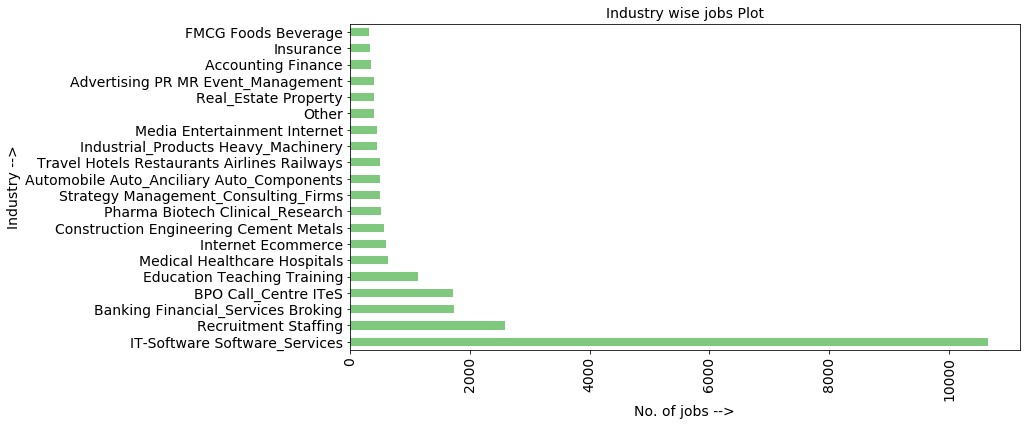

In [33]:
print(df['Industry'].value_counts())
plt.figure(figsize=(12,6))
df['Industry'].value_counts().iloc[:20].plot(kind='barh', colormap='Accent')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Industry -->',fontsize=14)
plt.xlabel('No. of jobs -->',fontsize=14)
plt.title('Industry wise jobs Plot',fontsize=14)
plt.show()

<hr>

### Role

In [34]:
df['Role'].value_counts()

Software Developer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               6250
Associate/Senior Associate -(NonTechnical)                                                                                                                                        

<b>We have 102 (974-872) samples with role as company description or unrealted long text. We replace them with role as 'Other' </b>

In [35]:
df['Role'] = df['Role'].map(lambda x: np.where(len(str(x)) > 80, 'Other', x))

Software Developer                            6250
Associate/Senior Associate -(NonTechnical)    1690
Sales/Business Development Manager            1530
Sales Executive/Officer                       1152
Other                                          974
Team Lead/Technical Lead                       833
Associate/Senior Associate -(Technical)        503
Accounts Executive/Accountant                  499
Recruitment Executive                          416
Testing Engineer                               402
Name: Role, dtype: int64


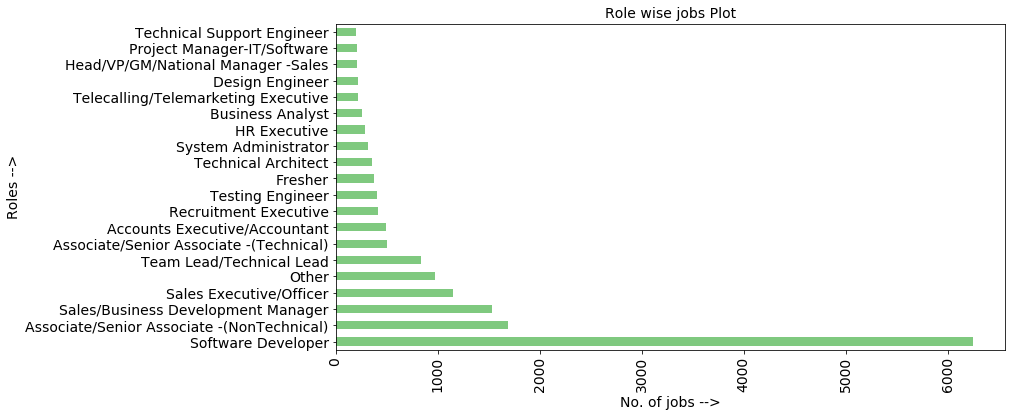

In [36]:
print(df['Role'].value_counts().iloc[:10])
plt.figure(figsize=(12,6))
df['Role'].value_counts().iloc[:20].plot(kind='barh', colormap='Accent')
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Roles -->',fontsize=14)
plt.xlabel('No. of jobs -->',fontsize=14)
plt.title('Role wise jobs Plot',fontsize=14)
plt.show()

<hr>

In [37]:
data = pd.read_csv('processed_data.csv')
data.shape

(28367, 9)

### Now we extract some meaningful information from the data

<b>
Q. Most popular job titles with salary and exp <br>
Q. Jobs with top salaries, titles, exp, role and role<br>
Q. Jobs titles, industry that ask for max experience<br>
Q. Locations with maximum jobs opportunities<br>
Q. Highest paying key skills<br>   
</b>

In [38]:

for i in data['Job Title'].value_counts().index.tolist()[:10]:
    df = data[(data['Job Title'] == i) & (data['Job Salary'] != 'Not Disclosed by Recruiter')][['Job Salary','Job Experience Required']]
    fig = px.bar(df, x='Job Salary', y='Job Experience Required',
                 hover_data=['Job Salary', 'Job Experience Required'], color='Job Salary',
                 labels={'pop':'population of Canada'}, height=400,
                 title = 'Top 10 most popular Job Titles Exp and Salary : ' + i)
    fig.show()
    print('-'*80)


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


<b>Q. Highest paying job titles with role</b>

In [46]:
df = data[data['Job Salary'] != 'Not Disclosed by Recruiter'].sort_values('Job Salary',ascending=False)[['Job Salary','Role Category']]
fig = px.sunburst(df, path=['Role Category','Job Salary'])
fig.show()

<b>Q. Top Jobs titles, industry that ask for max experience</b>

In [48]:
data['Average_Job_Exp_Req'] = data['Job Experience Required'].map(lambda x: re.sub('[^0-9]',' ',x))
data['Average_Job_Exp_Req'] = data['Average_Job_Exp_Req'].map(lambda x: np.mean([int(i) for i in x.split()]))

In [49]:
df = data.sort_values(by = "Average_Job_Exp_Req", ascending = False)[['Job Title','Role','Average_Job_Exp_Req']].reset_index(drop=True)

In [50]:
fig = px.sunburst(df, path=['Role','Average_Job_Exp_Req'])
fig.show()

<b>Q. Locations with maximum jobs opportunities</b>

In [42]:
for i in data.Location.value_counts().index.tolist()[:10]:
    fig = px.pie(data[data.Location == i], names='Role Category',title = 'Job Roles in ' + i)
    fig.show()

<b>Q. Highest paying key skills</b>

In [43]:
data['Average_Salary'] = data[data['Job Salary'] != 'Not Disclosed by Recruiter']['Job Salary'].str.replace('-',' ')
data['Average_Salary'] = data['Average_Salary'].str.replace(',','')
data.loc[data[data.Average_Salary.notnull()]['Average_Salary'].index,'Average_Salary'] = data[data.Average_Salary.notnull()].Average_Salary.map(lambda x: np.mean([int(i) for i in x.split()]))

In [45]:
data[data.Average_Salary.notnull()][['Key Skills','Average_Salary']].sort_values('Average_Salary',ascending=False).reset_index(drop=True)[:50]

Key Skills Average_Salary
0                                      java_developer          1e+13
1   po contract_review operational_excellence serv...    9.00001e+11
2   interviewing recruitment fresher mba_fresher r...    1.00417e+07
3   oop java html5 design_patterns xml object_orie...          1e+07
4                       banking digital_marketing cdo          1e+07
5                  fire_safety fire senior_management        7.5e+06
6   vice_president assistant_vice_president biddin...        7.5e+06
7   head csr gm legal human_resource_management hi...       6.75e+06
8   financial_institution mis income_tax consolida...        6.5e+06
9   finance_function taxation financial_reporting ...        6.5e+06
10  product_development design_development industr...       6.25e+06
11  business_development broking broker sales head...          6e+06
12  life_cycle portfolio_management new_product_la...          6e+06
13  risk_management regulatory_compliance process_...          6e+06
14  digital_marketing sales online_marketing brand...          6e+06
15  zonal_manager svp life_insurance sales_&_marke...          6e+06
16  supplier_evaluation software_development value...          6e+06
17     company_secretary legal secretarial_activities        5.5e+06
18  project_management presales solution_delivery ...        5.5e+06
19  product_management bd partnerships strategy b2...        5.5e+06
20  data_structures artificial_intelligence ruby_r...        5.5e+06
21  team_management software_development c++ java ...       5.25e+06
22     operations production_planning head_operations       5.25e+06
23  cloud storage server devops it_infrastructure_...       5.25e+06
24  pr marketing_campaigns media_buying marketing_...          5e+06
25  it_service_delivery it_service_delivery_manage...          5e+06
26  strategic_vendor_development strategic_sourcin...          5e+06
27  company_secretarial fund_management companies_...       4.75e+06
28  vmware service_desk_management networking it_o...       4.75e+06
29  digital_marketing online_marketing ppc display...       4.75e+06
30  agency_sales corporate_strategy profitability ...        4.5e+06
31              application_development it_skills c++        4.5e+06
32  mba_finance fpa financial_planning corporate_f...        4.5e+06
33                   b2b_sales key_account_management        4.5e+06
34         brand marketing brand_development branding        4.5e+06
35  mortgages home_loan channel_management housing...        4.5e+06
36  java android artificial_intelligence python co...        4.5e+06
37  channel_partners national regional_sales fmcg ...        4.5e+06
38                                         commercial        4.5e+06
39  sap us_gaap finance financial_control manufact...      4.375e+06
40             devops linux aws server sql deployment       4.25e+06
41  development_management software_development bu...       4.25e+06
42  network_infrastructure unix_shell_scripting pe...       4.25e+06
43                       insurance_sales mutual_funds       4.25e+06
44                               compensation rewards       4.25e+06
45               rewards compensation global_mobility       4.25e+06
46  internal_audit internal_control audit_manageme...       4.25e+06
47  leadership_training technical_leadership mvc ....       4.25e+06
48  six_sigma process_excellence team_management b...      4.125e+06
49       entry_level campus_hiring talent_acquisition      4.125e+06

<center>---END---</center>